<a href="https://colab.research.google.com/github/malgorzata-szczypior/jdszr3-datavirus/blob/main/DL1_GSz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import pandas as pd
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [123]:
class Model():
  '''
  Each successive line contians 785 comma separated values between 0 and 255
  The first value is the label
  The rest are the pixel values for that picture
  The function, that will return 2 np.array types.
  One with all the labels and other with all the images
  '''

  def __init__(self):
    def get_data(filename):
      with open(filename) as training_file:
        reader = csv.reader(training_file, delimiter=',')    
        imgs = []
        labels = []

        next(reader, None)
        
        for row in reader:
            label = row[0]
            data = row[1:]
            img = np.array(data).reshape((28, 28))

            imgs.append(img)
            labels.append(label)

        images = np.array(imgs).astype(float)
        labels = np.array(labels).astype(float)
      return images, labels


    self.training_images, self.training_labels = get_data("/content/drive/MyDrive/DL-project/sign_mnist_train.csv")
    self.testing_images, self.testing_labels = get_data("/content/drive/MyDrive/DL-project/sign_mnist_test.csv")

    print("Total Training images", self.training_images.shape)
    print("Total Training labels",self.training_labels.shape)
    print("Total Testing images",self.testing_images.shape)
    print("Total Testing labels",self.testing_labels.shape)

    #Data Augmentation
    self.training_images = np.expand_dims(self.training_images, axis = 3)
    self.testing_images = np.expand_dims(self.testing_images, axis = 3)

    # Create an ImageDataGenerator and do Image Augmentation
    self.train_datagen = ImageDataGenerator(
      rescale=1. / 255, #rescaling factor
      rotation_range=40, #degree range for random rotations
      width_shift_range=0.2, #
      height_shift_range=0.2, #
      shear_range=0.2,  #Shear Intensity (Shear angle in counter-clockwise direction in degrees)
      zoom_range=0.2,   #Float or [lower, upper]. Range for random zoom. 
      horizontal_flip=True, #Randomly flip inputs horizontally.
      fill_mode='nearest' #Randomly flip inputs vertically
      )

    self.validation_datagen = ImageDataGenerator(rescale=1. / 255 )

    self.train_gen = self.train_datagen.flow(
      self.training_images,
      self.training_labels,
      batch_size=20
    )

    self.val_gen = self.validation_datagen.flow(
      self.testing_images,
      self.testing_labels,
      batch_size=20
    )
  

  def show_images(self):
    for i in range(0, 9):
      pyplot.subplot(330 + 1 + i)
      img=self.training_images[i][:].reshape(28,28)
      pyplot.imshow(img)
      pyplot.title("Sign " + str(self.training_labels[i]))
      pyplot.axis('off')
	# show the plot
    plt.suptitle("Before Augmentation") 
    pyplot.show()

    for i in range(0, 9):
      show=self.train_gen.next()
      pyplot.subplot(3,3,i+1)
      pyplot.imshow(show[0][i].reshape(28, 28))
      pyplot.title("Sign " + str(show[1][i]))
      pyplot.axis('off')
	# show the plot
    plt.suptitle("After Augmentation") 
    pyplot.show()
  
  
  #function which plots accuracy and loss
  #def show_results(self):


    #function for creating model with some hiperparametrs
  def create_model(self):
    self.model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(26, activation='softmax')
        ])

# Compile Model. As this is multi class classification, keep loss as categorical
    self.model.compile(optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

    #use the train_gen and val_gen when fiting the model
    # Train the Model
  def train_model(self):
    early_stop=EarlyStopping(monitor='val_loss',min_delta=0.001,patience=10)
    saved=ModelCheckpoint("model_Gosia.h5", save_best_only=True)


    self.history = self.model.fit_generator(
        self.train_gen,
        epochs=25,
        validation_data=self.val_gen,
        callbacks=[saved,early_stop])
    
    self.model.evaluate(self.testing_images, self.testing_labels, verbose=0)
        
    '''
    self.history = model.fit_generator(train_gen,
        epochs=20,
        validation_data=val_gen)

    model.evaluate(testing_images, testing_labels, verbose=0)
    '''

    

In [124]:
modeling = Model()


Total Training images (27455, 28, 28)
Total Training labels (27455,)
Total Testing images (7172, 28, 28)
Total Testing labels (7172,)


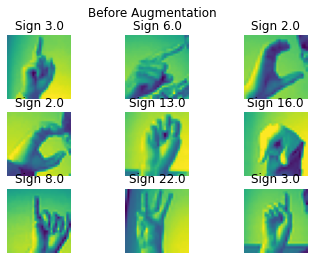

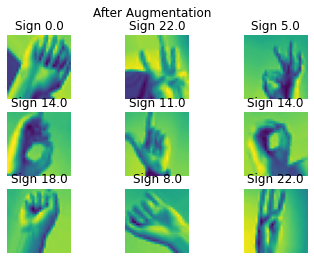

In [125]:
modeling.show_images()

In [126]:
modeling.create_model()

In [127]:
modeling.train_model()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
1373/1373 [==============================] - 45s 10ms/step - loss: 2.5262 - accuracy: 0.2194 - val_loss: 1.5968 - val_accuracy: 0.4660
Epoch 2/25
1373/1373 [==============================] - 13s 10ms/step - loss: 1.6563 - accuracy: 0.4647 - val_loss: 1.0698 - val_accuracy: 0.6180
Epoch 3/25
1373/1373 [==============================] - 13s 10ms/step - loss: 1.2909 - accuracy: 0.5764 - val_loss: 0.8523 - val_accuracy: 0.7117
Epoch 4/25
1373/1373 [==============================] - 13s 10ms/step - loss: 1.0432 - accuracy: 0.6538 - val_loss: 0.5458 - val_accuracy: 0.8037
Epoch 5/25
1373/1373 [==============================] - 14s 10ms/step - loss: 0.8970 - accuracy: 0.7026 - val_loss: 0.5397 - val_accuracy: 0.8100
Epoch 6/25
1373/1373 [==============================] - 14s 10ms/step - loss: 0.7902 - accuracy: 0.7381 - val_loss: 0.5164 - val_accuracy: 0.8125
Epoch 7/25
1373/1373 [==============================] - 14s 10ms/step - loss: 0.7026 - accuracy: 0.7648 - val_loss: 0.3657 -